# ***Predictive Analytics On Adults Income - Naufal Fahri***

**Background**

According to a survey by the Central Statistics Agency of Indonesia published on November 6, 2023, the unemployment rate in Indonesia is 5.32 percent [[1]](https://www.bps.go.id/id/pressrelease/2023/11/06/2002/tingkat-pengangguran-terbuka--tpt--sebesar-5-32-persen-dan-rata-rata-upah-buruh-sebesar-3-18-juta-rupiah-per-bulan.html). Although this is a decrease from previous years, it remains an issue that needs to be resolved. The results of the study by Pramudjasi and Juliansyah, 2019 in the FEB Unmul Journal [[2]](https://journal.feb.unmul.ac.id/index.php/KINERJA/article/download/5284/472) stated that the population has a significant positive effect on the unemployment rate. This is also confirmed in the research of Sari and Pangestuty, 2022 in  [[3]](https://jdess.ub.ac.id/index.php/jdess/article/download/78/57/373) stating that population growth has an impact on the increase in the Open Unemployment Rate. Various surveys and findings from this academic journal are the background for the Author in trying to analyze what factors have a strong relationship to unemployment, employment, especially factors that are related to high income.

This project focuses on the analysis of the "Adults Income" dataset with the aim of identifying and predicting factors that have a high correlation, or even contribute to employment, especially the amount of income of a person. In this case, the target feature of this dataset is whether a person's annual income is <50,000 dollars or >= 50,000 dollars per year, so this project will solve the classification case. Although this dataset is taken from the 1996 census data, this dataset still has significant relevance today, due to the general nature of the variables in this dataset and the absence of drastic changes in the components that determine incomedanya perubahan yang drastis pada komponen-komponen penentu penghasilan. 

According to Jepchumba from Microsoft [[4]](https://techcommunity.microsoft.com/t5/educator-developer-blog/getting-started-with-using-visual-machine-learning-tools-for/ba-p/3578397), *machine learning* , is a technique that uses advanced mathematics and statistics to recognize patterns in data that do not exist explicitly, and can predict according to the results of these patterns. With the variety of factors (variables) involved in this project, machine learning is the best solution. Identification and prediction of factors will be done by applying data analysis techniques such as Exploratory Data Analysis (EDA) and using Machine Learning algorithms such as Random Forest, K-Nearest Neighbors, and Boosting .

This project is a small tool to help solve the problem of difficulty in finding work, by analyzing the dynamics of high annual income factors. The results of this project are expected to help the Government and individuals in productive age as additional insight related to this problem, and help these parties to develop society and themselves to improve the quality of life.

## ***Business Understanding***


Stakeholder dan sasaran: 
1. Government 
- As the highest level organization in a country, the government can make good policies and changes, in order to improve the quality of life of its people. One way is to create/improve the system in the country to encourage the advancement of its human resources.
2. Individual 
- At the individual level, it is hoped that the results of this project will provide insight into important factors that can improve the quality of life, through work and employment with high annual incomes.

**Problem Statements**
1. Of the various features, which has the most influence on income?
2. With certain characteristics, can income be predicted?
   
*income refers to annual income.

**Predictive Modelling Goals**
1. Knowing the features that have a high relationship to income.
2. Able to predict income with an accuracy above 90%.

**Solution Statements (Methodology)**
1. The target feature in this dataset is a boolean variable between >50k and <= 50k, so this is a Classification prediction case.
2. Perform Exploratory Data Analysis to obtain meaningful information in the data and understand the dynamics of the features.
3. Testing the differences between missing values ​​handling techniques, and their impact on the accuracy of machine learning models.
4. Create a machine learning model that can predict income with an accuracy above 90%

5. Using Accuracy, Precision, Recall, F1-Score, and Confusion Matrix to evaluate model performance.

## ***Data Understanding***

Dataset: https://archive.ics.uci.edu/dataset/2/adult 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/nfahrisalim/Adults-Income-Predictive-Analysis/main/adult.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Detailed description of this dataset is as follows.
1. There are 48,842 data samples
2. There are two different data types, namely 'object' (categorical), and 'int64' (numeric).
3. Of the 15 variable columns, there are 9 categorical columns and 6 numeric columns.
4. The division is 14 feature columns and 1 target column.
5. In this dataset, missing values, marked with a '?', constitute approximately 7% of the entire dataset.

---

In [3]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [5]:
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [6]:
df.rename(columns = {
    'education' : 'educationClass',
    'education-num' : 'educationLevel',
    'marital-status' : 'status',
    'capital-gain' : 'gain',
    'capital-loss' : 'loss',
    'hours-per-week' : 'hours',
    'native-country' : 'native' }, inplace = True)

df

,age,workclass,fnlwgt,educationClass,educationLevel,status,occupation,relationship,race,sex,gain,loss,hours,native,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


There are several methods to handle missing values. Since the ratio of missing values to total samples is relatively small, with a worst-case scenario of 1:7, the drop method is still a suitable choice.

In [7]:
# map target to binary classification
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# drop unnecesarry columns
df.drop(columns = 'fnlwgt', inplace = True, axis = 1)

***EDA - Univariate Analysis***

---



                  sample count  percentage
workclass                                 
Private                  33906        73.6
Self-emp-not-inc          3862         8.4
Local-gov                 3136         6.8
State-gov                 1981         4.3
Self-emp-inc              1695         3.7
Federal-gov               1432         3.1
Without-pay                 21         0.0
Never-worked                10         0.0


<Axes: title={'center': 'workclass'}, xlabel='workclass'>

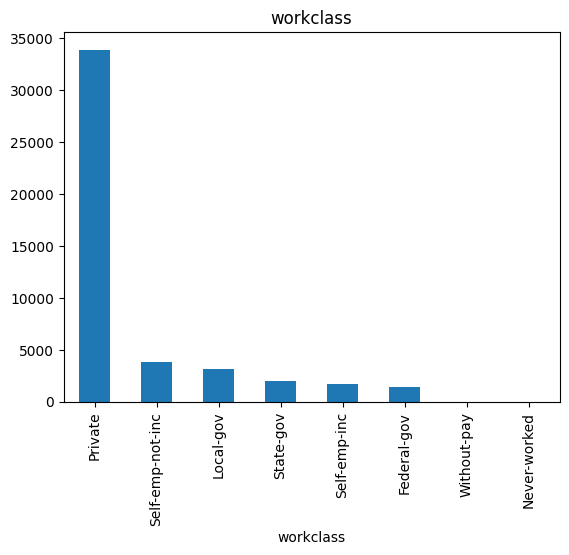

In [8]:
obj_cols = df.select_dtypes(include = ['object'])

feature = obj_cols.columns[0]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

                sample count  percentage
educationClass                          
HS-grad                15784        32.3
Some-college           10878        22.3
Bachelors               8025        16.4
Masters                 2657         5.4
Assoc-voc               2061         4.2
11th                    1812         3.7
Assoc-acdm              1601         3.3
10th                    1389         2.8
7th-8th                  955         2.0
Prof-school              834         1.7
9th                      756         1.5
12th                     657         1.3
Doctorate                594         1.2
5th-6th                  509         1.0
1st-4th                  247         0.5
Preschool                 83         0.2


<Axes: title={'center': 'educationClass'}, xlabel='educationClass'>

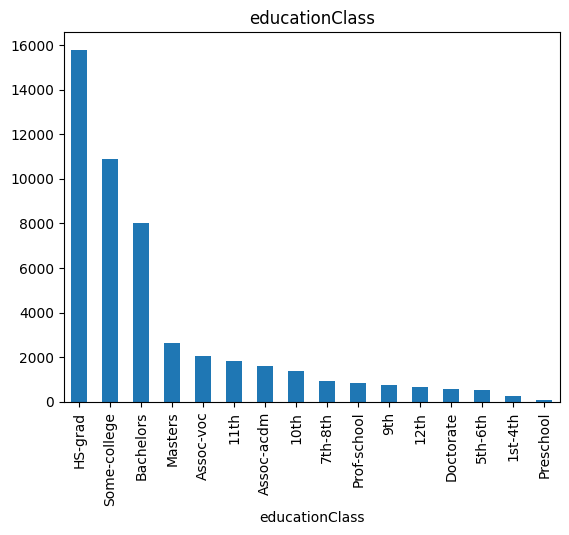

In [9]:
feature = obj_cols.columns[1]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

                       sample count  percentage
status                                         
Married-civ-spouse            22379        45.8
Never-married                 16117        33.0
Divorced                       6633        13.6
Separated                      1530         3.1
Widowed                        1518         3.1
Married-spouse-absent           628         1.3
Married-AF-spouse                37         0.1


<Axes: title={'center': 'status'}, xlabel='status'>

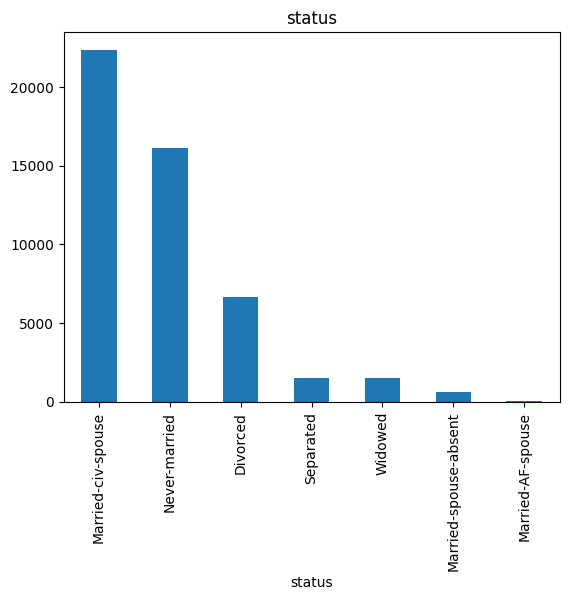

In [10]:
feature = obj_cols.columns[2]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

                   sample count  percentage
occupation                                 
Prof-specialty             6172        13.4
Craft-repair               6112        13.3
Exec-managerial            6086        13.2
Adm-clerical               5611        12.2
Sales                      5504        12.0
Other-service              4923        10.7
Machine-op-inspct          3022         6.6
Transport-moving           2355         5.1
Handlers-cleaners          2072         4.5
Farming-fishing            1490         3.2
Tech-support               1446         3.1
Protective-serv             983         2.1
Priv-house-serv             242         0.5
Armed-Forces                 15         0.0


<Axes: title={'center': 'occupation'}, xlabel='occupation'>

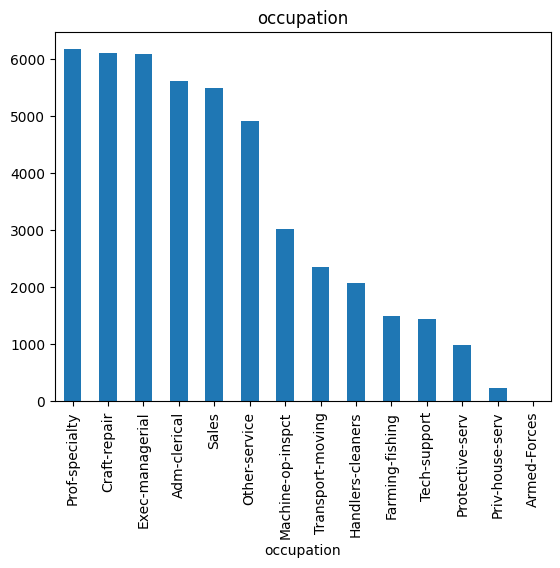

In [11]:
feature = obj_cols.columns[3]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

In [12]:
replacement_dict = {
    'Prof-specialty': 'Specialty',
    'Craft-repair': 'Repair',
    'Exec-managerial': 'Managerial',
    'Adm-clerical': 'Clerical',
    'Other-service': 'Others',
    'Machine-op-inspct': 'Inspection',
    'Transport-moving': 'Transport',
    'Handlers-cleaners': 'Cleaners',
    'Farming-fishing': 'Agriculture',
    'Tech-support': 'ITSup',
    'Protective-serv': 'ProtectiveService',
    'Priv-house-serv': 'PrivateHouse Service',
    'Armed-Forces': 'ArmedForces'
}

df['occupation'] = df['occupation'].replace(replacement_dict)

                sample count  percentage
relationship                            
Husband                19716        40.4
Not-in-family          12583        25.8
Own-child               7581        15.5
Unmarried               5125        10.5
Wife                    2331         4.8
Other-relative          1506         3.1


<Axes: title={'center': 'relationship'}, xlabel='relationship'>

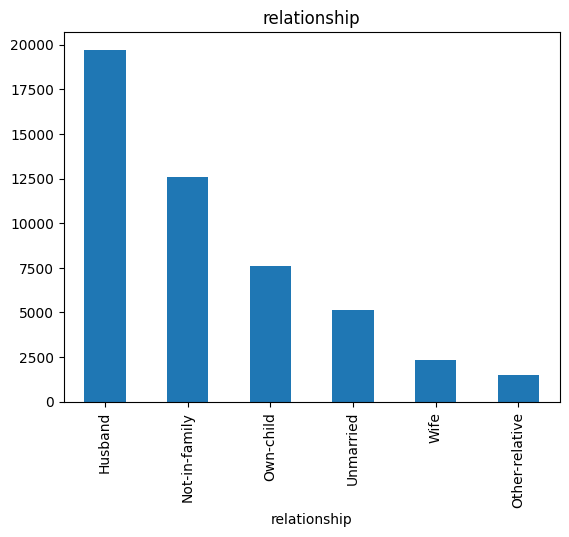

In [13]:
feature = obj_cols.columns[4]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

                    sample count  percentage
race                                        
White                      41762        85.5
Black                       4685         9.6
Asian-Pac-Islander          1519         3.1
Amer-Indian-Eskimo           470         1.0
Other                        406         0.8


<Axes: title={'center': 'race'}, xlabel='race'>

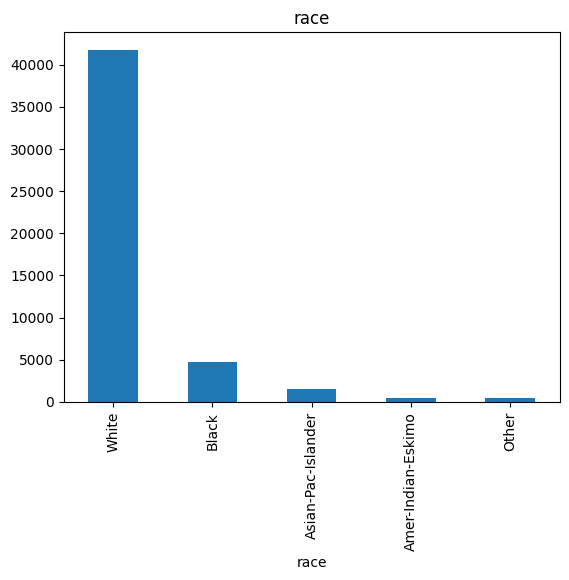

In [14]:
feature = obj_cols.columns[5]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

        sample count  percentage
sex                             
Male           32650        66.8
Female         16192        33.2


<Axes: title={'center': 'sex'}, xlabel='sex'>

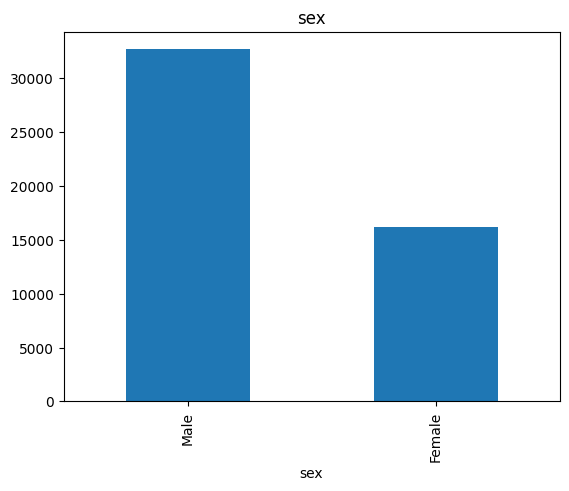

In [15]:
feature = obj_cols.columns[6]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

In [16]:
replacement_dict = {
      'United-States' : 'USA',
      'Puerto-Rico' : 'PuertoRic',
      'El-Savador' : 'ElSavad',
      'Dominican-Republic' : 'Dominican',
      'Trinadad&Tobago' : 'Trinadad',
      'Outlying-US(Guam-USVI-etc)' : 'USBor',
      'Holand-Netherlands' : 'Holland'
}

df['native'] = df['native'].replace(replacement_dict)

             sample count  percentage
native                               
USA                 43832        91.3
Mexico                951         2.0
Philippines           295         0.6
Germany               206         0.4
PuertoRic             184         0.4
Canada                182         0.4
El-Salvador           155         0.3
India                 151         0.3
Cuba                  138         0.3
England               127         0.3
China                 122         0.3
South                 115         0.2
Jamaica               106         0.2
Italy                 105         0.2
Dominican             103         0.2
Japan                  92         0.2
Guatemala              88         0.2
Poland                 87         0.2
Vietnam                86         0.2
Columbia               85         0.2
Haiti                  75         0.2
Portugal               67         0.1
Taiwan                 65         0.1
Iran                   59         0.1
Greece      

<Axes: title={'center': 'native'}, xlabel='native'>

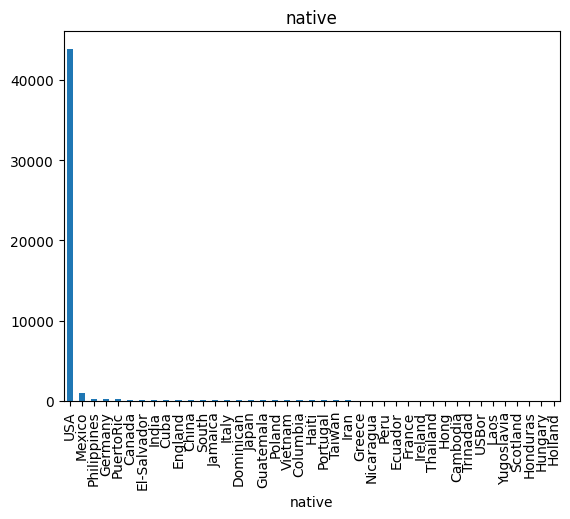

In [17]:
feature = obj_cols.columns[7]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

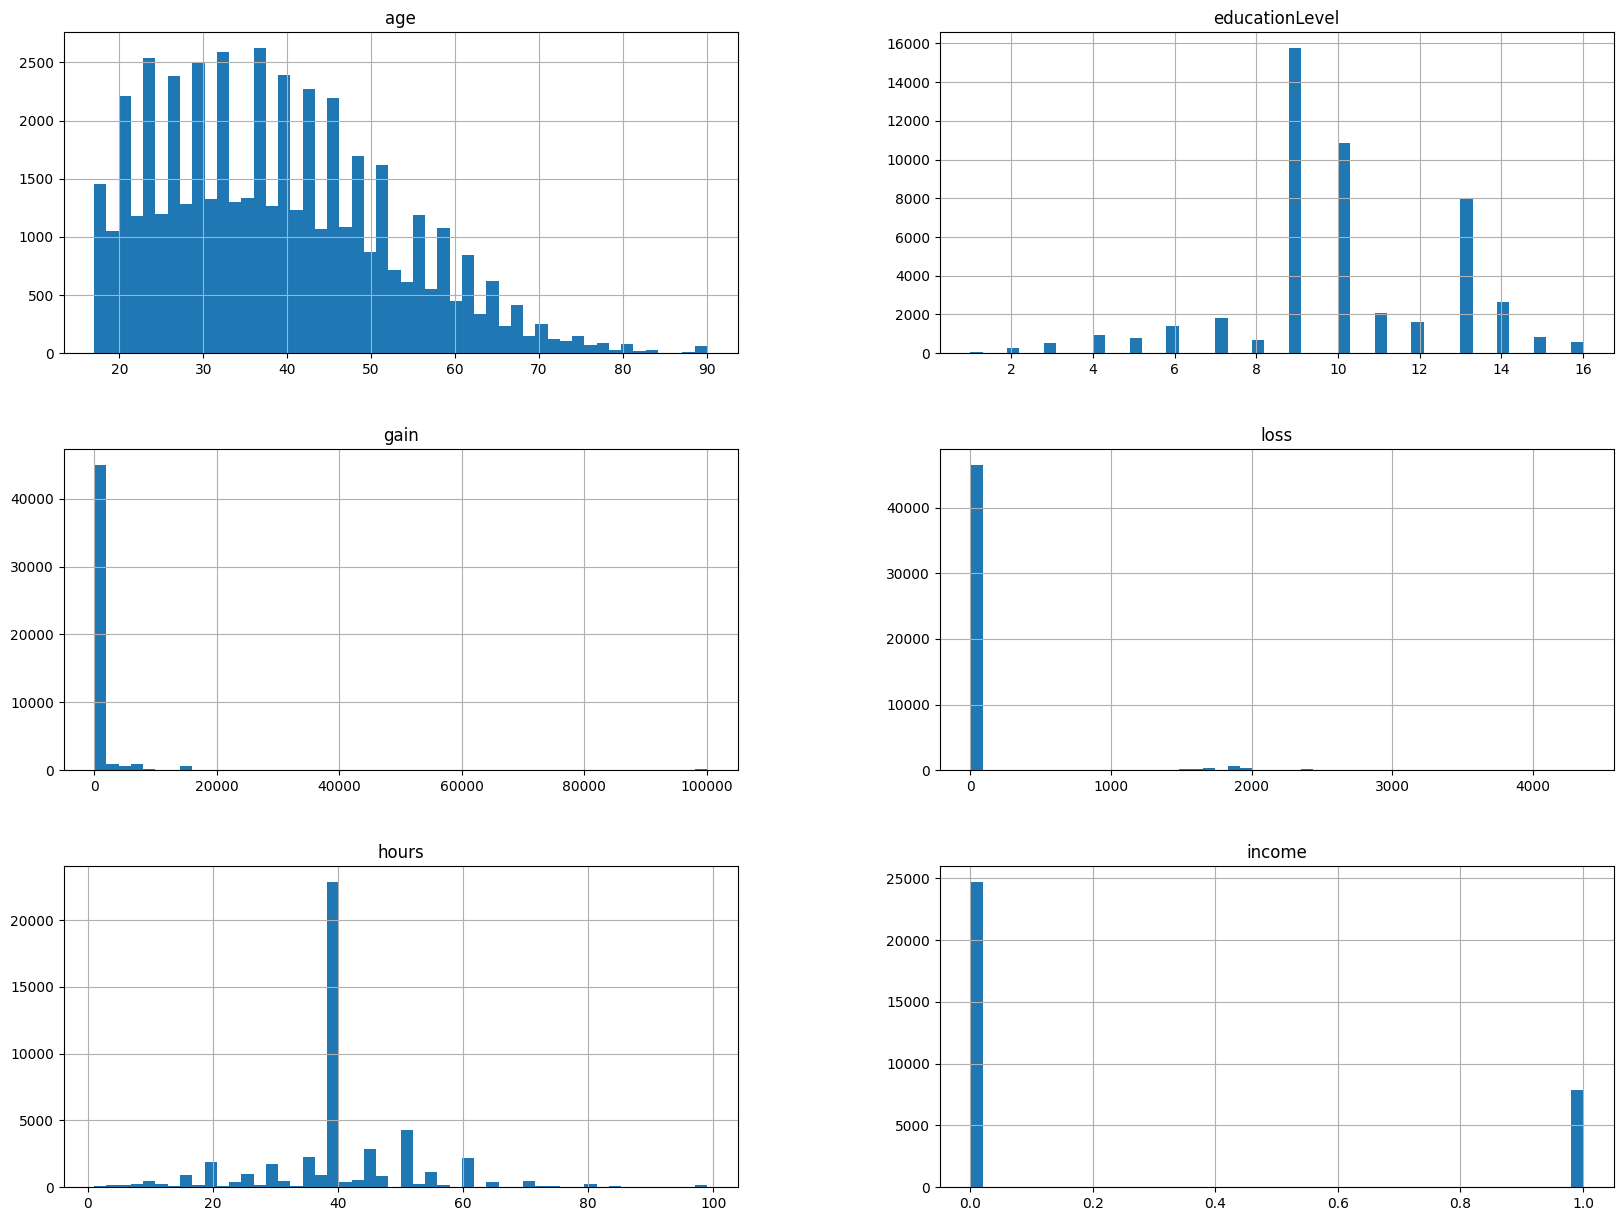

In [18]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

Dari hasil Univariate Analysis, dapat dilihat bahwa dataset memiliki kecenderungan yang tinggi pada perbedaan modus dan data yang lain yang sangat besar. Hal ini menyiratkan bahwa dataset ini dapat juga diatasi missing valuesnya menggunakan metode statistik, seperti *mode imputation*.

***EDA - Multivariate Analysis***

---



C:\Users\ASUS\AppData\Local\Temp\ipykernel_5096\313010469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = 'income', kind = 'bar', dodge = False, height = 4, aspect = 3,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5096\313010469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = 'income', kind = 'bar', dodge = False, height = 4, aspect = 3,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5096\313010469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = 'income', kind = 'bar', dodge = False, height = 4, a

<Figure size 1500x800 with 0 Axes>

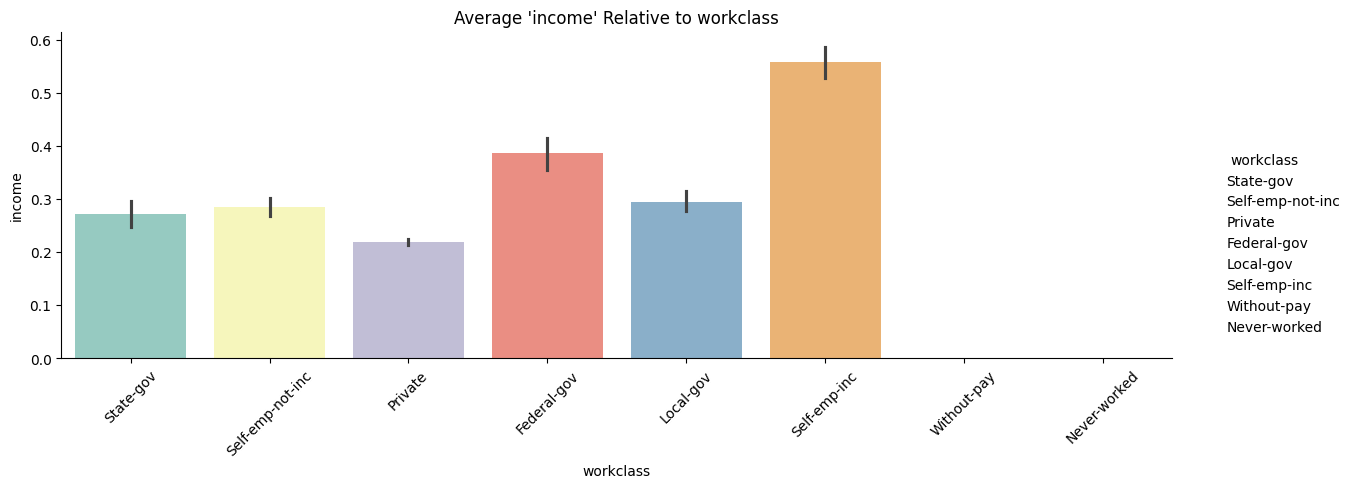

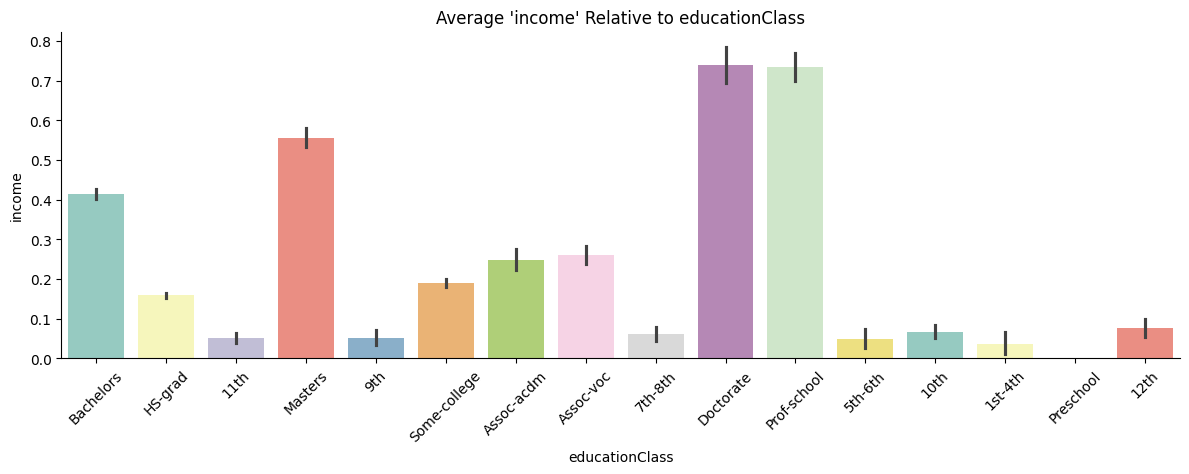

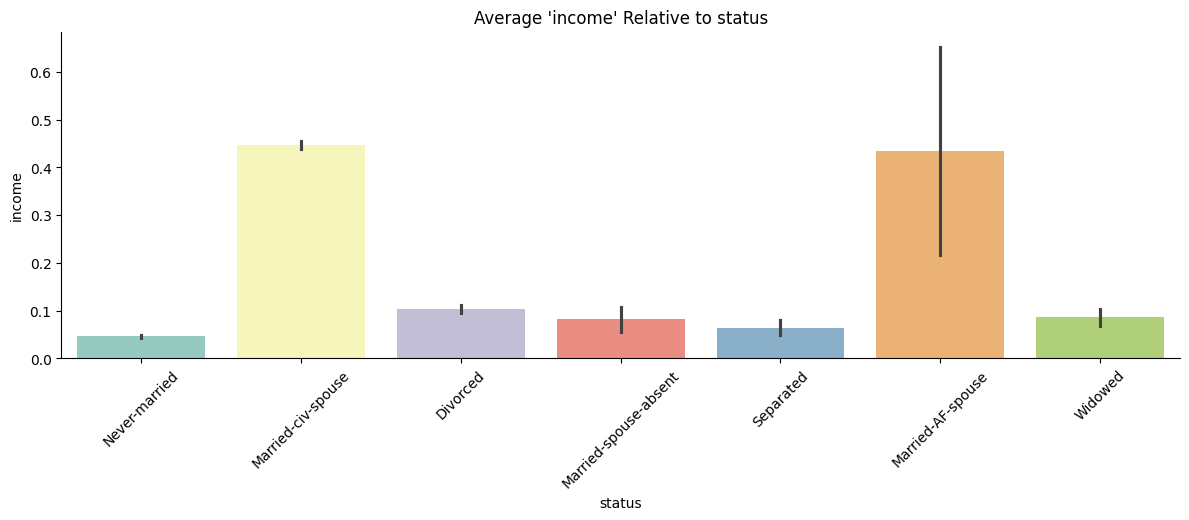

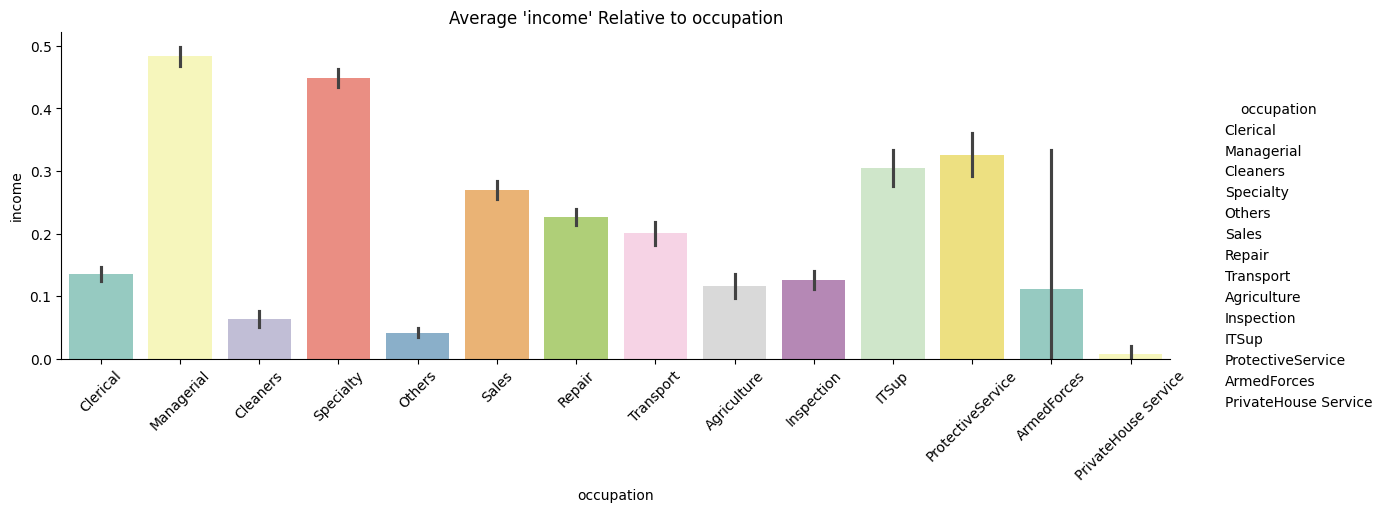

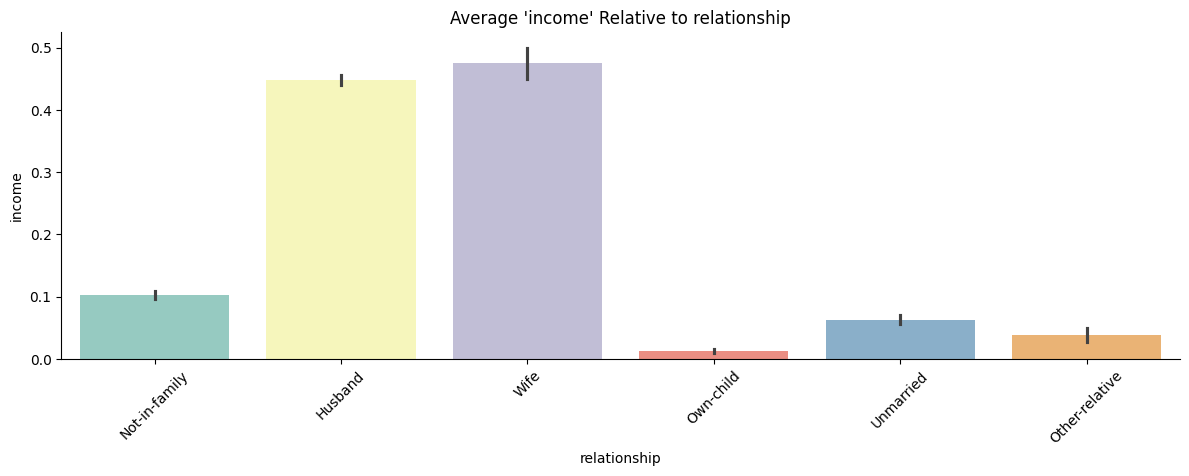

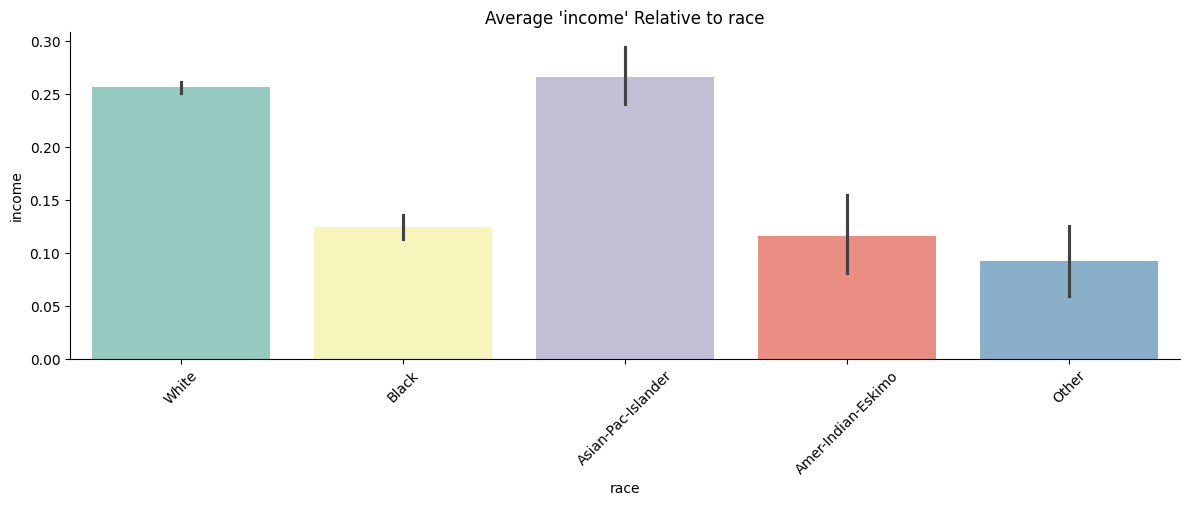

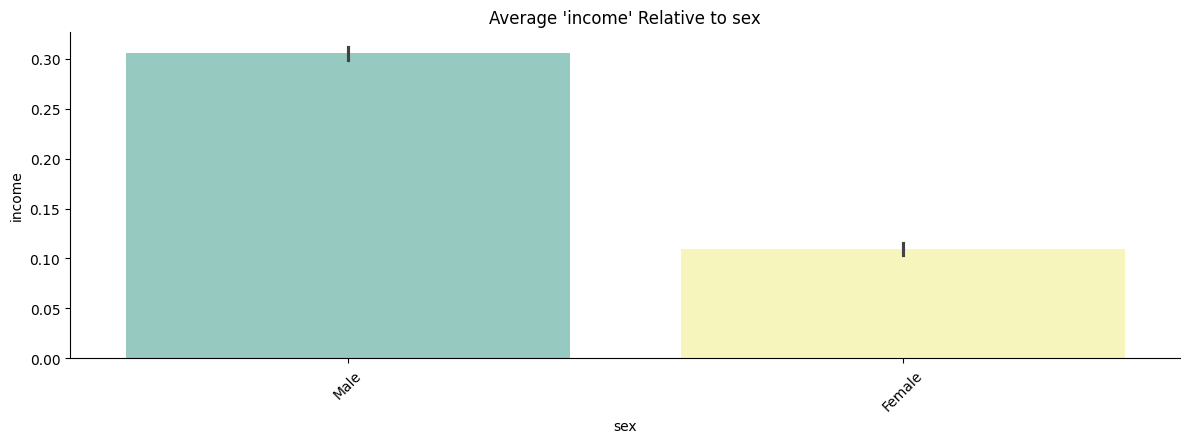

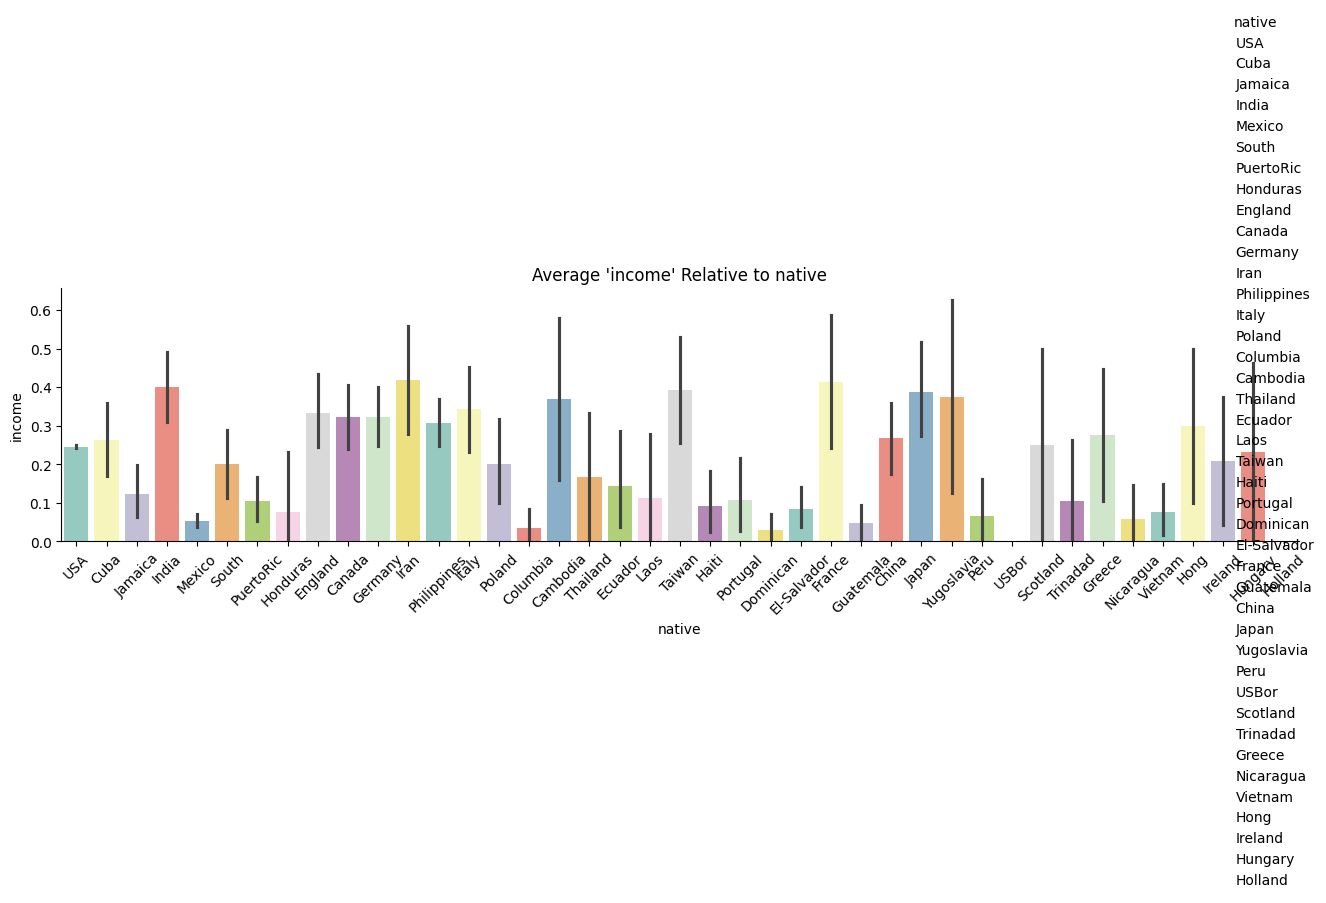

In [19]:
obj_list = obj_cols.columns.to_list()

plt.figure(figsize = (15, 8))

for col in obj_list:
  # plt.subplot(1, len(obj_list), i + 1)
  sns.catplot(x = col, y = 'income', kind = 'bar', dodge = False, height = 4, aspect = 3,
              data = df, palette = 'Set3')
  plt.xticks(rotation = 45)
  plt.title("Average 'income' Relative to {}".format(col))

plt.tight_layout()
plt.show()

The results of the **Multivariate Analysis** on **Categorical Features** are as follows

* **Workclass**, All work classes have income except for *never-worked*. On average, those working in government sectors (-gov) tend to have higher incomes compared to other work classes, with *self-emp-inc* having the highest income overall.

* **Education Class**, There is a clear income gap starting at the **bachelor's degree** level, which becomes even more pronounced for higher degrees such as **master's, doctorate,** and **professional school**.

* **Marital Status**, There is a trend showing that individuals with a **stable marriage** have higher incomes than those who are single, divorced, separated, or widowed.

* **Occupation**, The three highest-paying job sectors are **specialty (specialists)**, **managerial (executive)**, and **protective service (security services)**. Other occupations do not show a clear observable trend.

* **Relationship**, This supports the marital status findings, where individuals with the status of **husband** or **wife** have the highest incomes compared to other relationship statuses.

* **Race**, The two racial groups with the highest incomes are **White** and **Asian-Pac (Asian-Pacific Islander)**.

* **Gender**, Male incomes are higher than female incomes.

* **Native Country**, Income trends are less observable, indicating that **native country** is not a strong factor influencing income.

**Conclusion**, Among categorical features, the most influential factors are **education class**, **marital status**, and **relationship**.


---



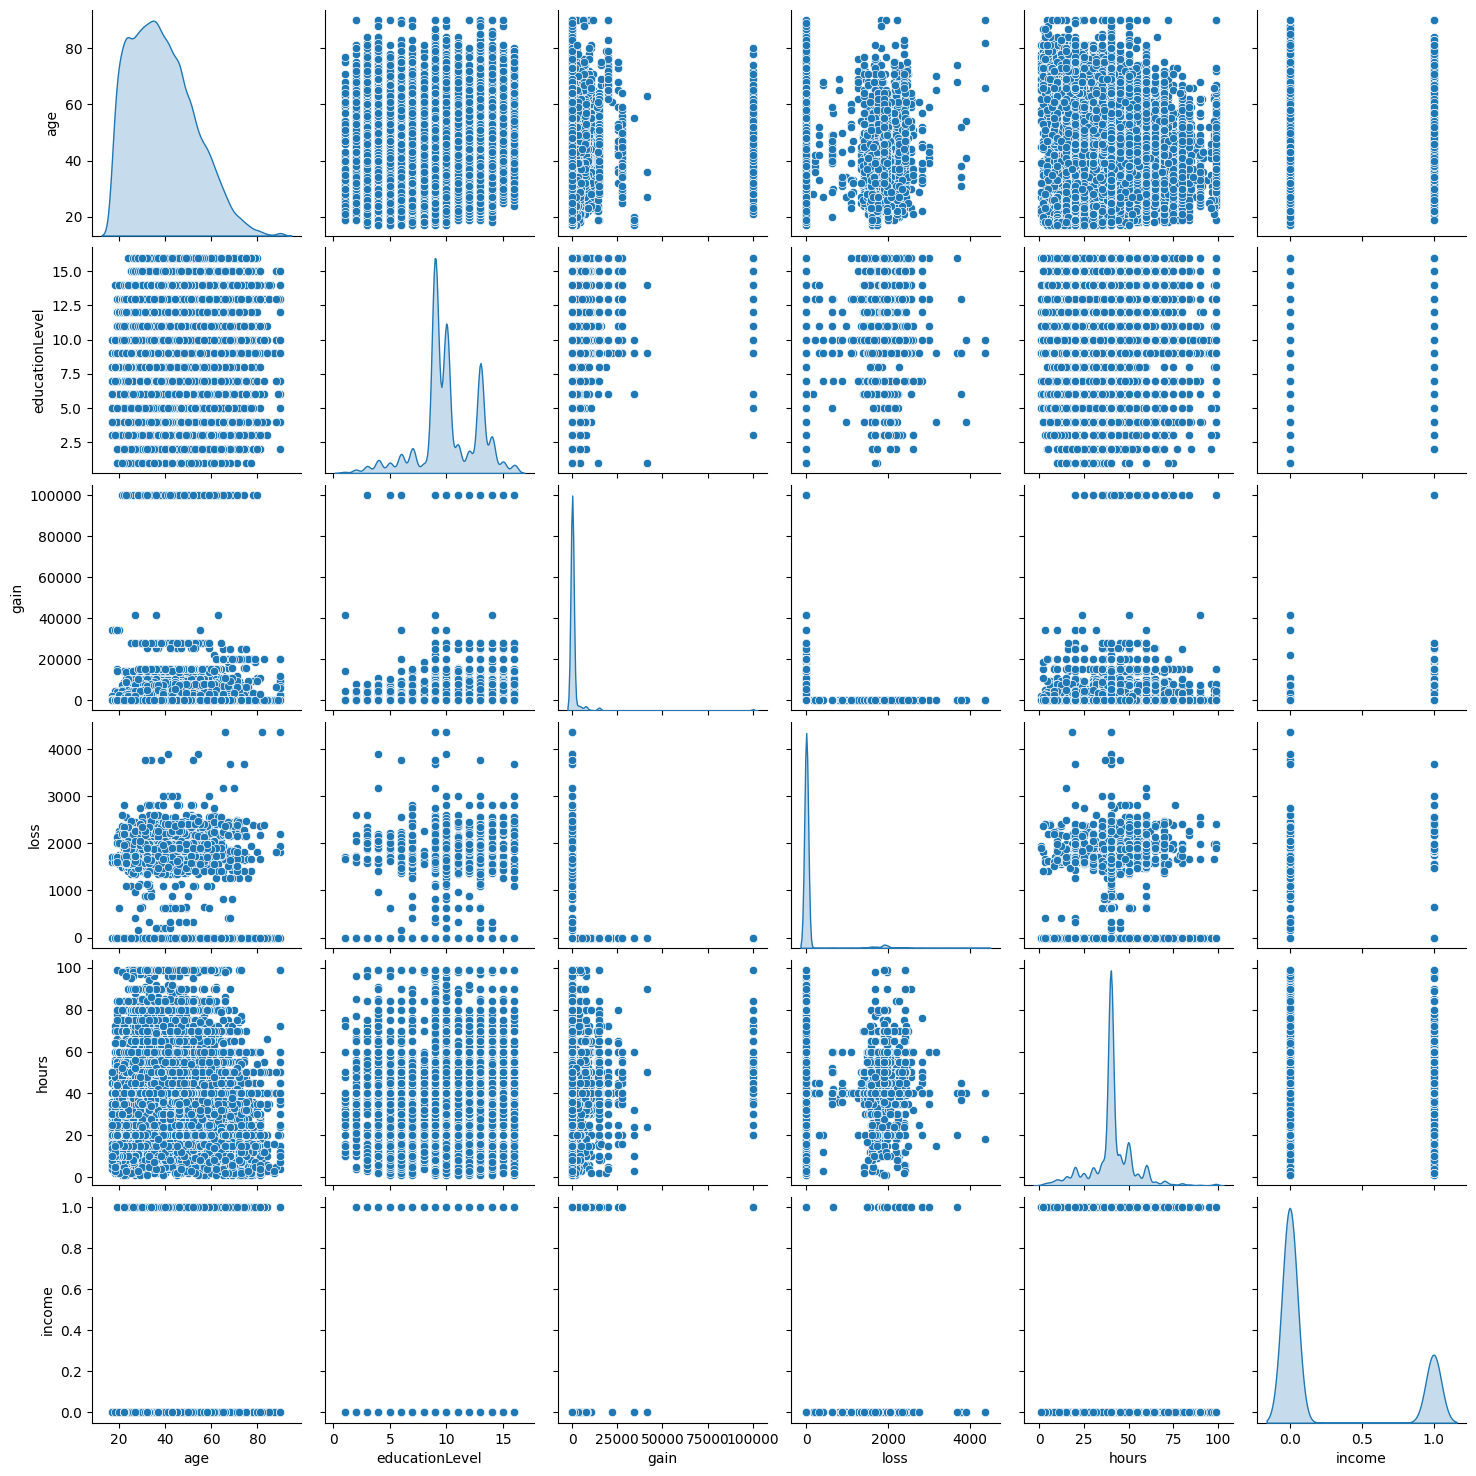

In [20]:
# Numerical Features
sns.pairplot(df, diag_kind = 'kde')

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\dython\__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution


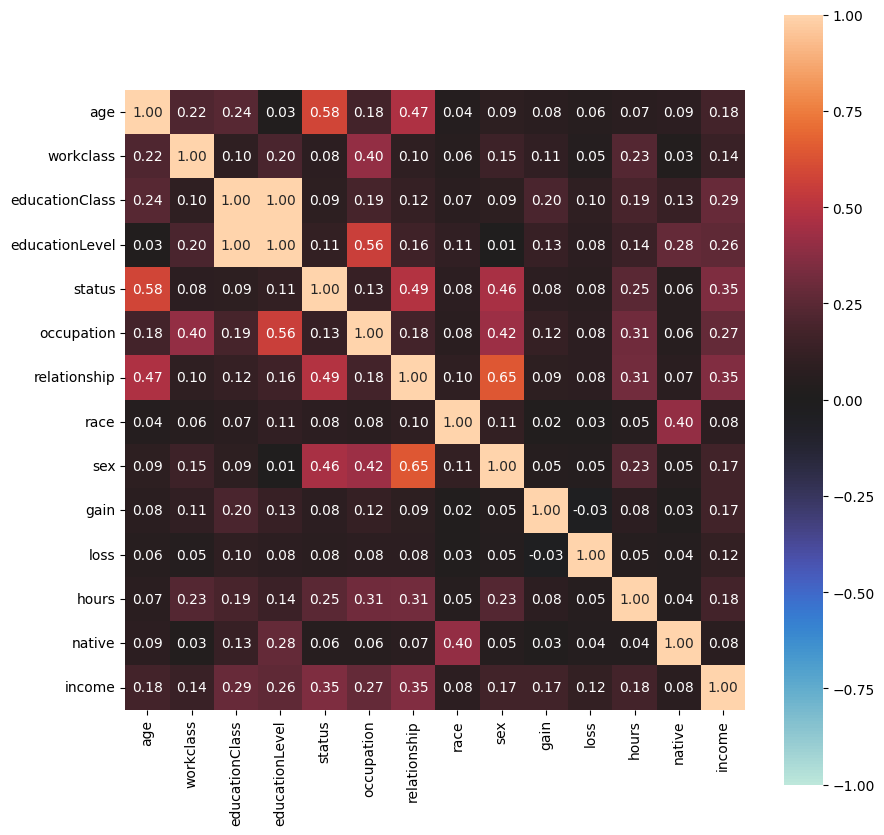

In [21]:
# Correlation Matrix
from dython.nominal import associations

complete_correlation = associations(df, filename='complete_correlation.png', figsize=(10, 10))

df_complete_corr = complete_correlation['corr']
df_complete_corr = df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all')


styled_corr_matrix = df_complete_corr.style.background_gradient(cmap='coolwarm', axis=None)

Strengthening the observations from the Multivariate Analysis on categorical features, it can be seen that status and relationship have the strongest correlation with income. However, since the range between the strongest and weakest correlation values is not too wide, no features will be dropped.

---



In [22]:
# Drop rows yang memiliki missing values
df_drop = df.loc[(df[['workclass','occupation','native']] != '?').all(axis=1)]
df_drop

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,sex,gain,loss,hours,native,income
0,39,State-gov,Bachelors,13,Never-married,Clerical,Not-in-family,White,Male,2174,0,40,USA,0.0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Managerial,Husband,White,Male,0,0,13,USA,0.0
2,38,Private,HS-grad,9,Divorced,Cleaners,Not-in-family,White,Male,0,0,40,USA,0.0
3,53,Private,11th,7,Married-civ-spouse,Cleaners,Husband,Black,Male,0,0,40,USA,0.0
4,28,Private,Bachelors,13,Married-civ-spouse,Specialty,Wife,Black,Female,0,0,40,Cuba,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13,Divorced,Specialty,Not-in-family,White,Female,0,0,36,USA,NaN
48838,64,NaN,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,USA,NaN
48839,38,Private,Bachelors,13,Married-civ-spouse,Specialty,Husband,White,Male,0,0,50,USA,NaN
48840,44,Private,Bachelors,13,Divorced,Clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,USA,NaN


### ***Data Preparation***

---

The **Data Preparation** process will be carried out in the following order,  
1. Feature Encoding  
2. Train-Test Split  
3. KNN Imputation  
4. Standardization  

In this stage, we will also explore the **impact of ordinality** and **missing value handling methods** on both the dataset and the final model accuracy.  

The datasets to be reviewed are:  
- **Dropped Data**  
  1. Dropped Dummy Data (One-Hot Encoded)  
  2. Dropped Ordinal Encoded Data (Ordinal Encoded)  

- **KNN Imputed Data**  
  1. KNN Imputed Ordinal Encoded Data,  
     where imputation will be performed **after the Train-Test Split** to prevent **data leakage**.  

---

### **Process Details**

**1. Feature Encoding**  
The first step is **feature encoding** using both **One-Hot Encoding** and **Ordinal Encoding**.  
This allows us to compare how different encoding methods affect the preservation of ordinal properties, which in turn impacts the final model accuracy.  

Before starting Data Preparation, a copy of the original dataset was created, and the initial **drop process** was applied.  
The output of this stage will be **three dataframes**:  
- Dropped One-Hot Encoded Data  
- Dropped Ordinal Encoded Data  
- Original Ordinal Encoded Data  

---

**2. Train-Test Split**  
Next, each of the three dataframes will be split into **training (X_train, y_train)** and **testing sets (X_test, y_test)**, resulting in **six datasets** in total.

---

**3. KNN Imputation**  
KNN Imputation will be applied **only to the original Ordinal Encoded data**, and **performed after the Train-Test Split** to avoid **data leakage**.  
This step is considered a **transformation process**, not a preprocessing step.

---

**4. Standardization**  
Finally, **standardization** will be applied to all `X_train` and `X_test` datasets to improve the performance and stability of the models.  

> Learn more about the importance of [Standardization](https://developers.google.com/machine-learning/data-prep/transform/normalization#:~:text=The%20goal%20of%20normalization%20is,training%20stability%20of%20the%20model).

---


***Dropped Data Preparation***

In [23]:
# import Ordinal Encoding library
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_drop_ordinal = df_drop.copy()
df_drop_dum = df_drop.copy()

# Ordinal Encoded
df_drop_ordinal[obj_cols.columns] = ordinal_encoder.fit_transform(df_drop_ordinal[obj_cols.columns])

# Dummy Encoded
df_drop_dum = pd.get_dummies(df_drop_dum, columns = obj_cols.columns, drop_first = True)

df_drop_ordinal

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,sex,gain,loss,hours,native,income
0,39,6.0,9.0,13,4.0,3.0,1.0,4.0,1.0,2174,0,40,37.0,0.0
1,50,5.0,9.0,13,2.0,6.0,0.0,4.0,1.0,0,0,13,37.0,0.0
2,38,3.0,11.0,9,0.0,2.0,1.0,4.0,1.0,0,0,40,37.0,0.0
3,53,3.0,1.0,7,2.0,2.0,0.0,2.0,1.0,0,0,40,37.0,0.0
4,28,3.0,9.0,13,2.0,12.0,5.0,2.0,0.0,0,0,40,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3.0,9.0,13,0.0,12.0,1.0,4.0,0.0,0,0,36,37.0,NaN
48838,64,NaN,11.0,9,6.0,NaN,2.0,2.0,1.0,0,0,40,37.0,NaN
48839,38,3.0,9.0,13,2.0,12.0,0.0,4.0,1.0,0,0,50,37.0,NaN
48840,44,3.0,9.0,13,0.0,3.0,3.0,1.0,1.0,5455,0,40,37.0,NaN


In [24]:
df_drop_dum

,age,educationLevel,gain,loss,hours,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_PuertoRic,native_Scotland,native_South,native_Taiwan,native_Thailand,native_Trinadad,native_USA,native_USBor,native_Vietnam,native_Yugoslavia
0,39,13,2174,0,40,0.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,13,0,0,13,0.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,9,0,0,40,0.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53,7,0,0,40,0.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28,13,0,0,40,0.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,13,0,0,36,NaN,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
48838,64,9,0,0,40,NaN,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
48839,38,13,0,0,50,NaN,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
48840,44,13,5455,0,40,NaN,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [25]:
df

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,sex,gain,loss,hours,native,income
0,39,State-gov,Bachelors,13,Never-married,Clerical,Not-in-family,White,Male,2174,0,40,USA,0.0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Managerial,Husband,White,Male,0,0,13,USA,0.0
2,38,Private,HS-grad,9,Divorced,Cleaners,Not-in-family,White,Male,0,0,40,USA,0.0
3,53,Private,11th,7,Married-civ-spouse,Cleaners,Husband,Black,Male,0,0,40,USA,0.0
4,28,Private,Bachelors,13,Married-civ-spouse,Specialty,Wife,Black,Female,0,0,40,Cuba,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13,Divorced,Specialty,Not-in-family,White,Female,0,0,36,USA,NaN
48838,64,NaN,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,USA,NaN
48839,38,Private,Bachelors,13,Married-civ-spouse,Specialty,Husband,White,Male,0,0,50,USA,NaN
48840,44,Private,Bachelors,13,Divorced,Clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,USA,NaN


In [26]:
ordinal_encoder = OrdinalEncoder()
df.replace('?', np.nan, inplace = True)

df[obj_cols.columns] = ordinal_encoder.fit_transform(df[obj_cols.columns])

df.isna().sum()

age                   0
workclass          2799
educationClass        0
educationLevel        0
status                0
occupation         2809
relationship          0
race                  0
sex                   0
gain                  0
loss                  0
hours                 0
native              857
income            16281
dtype: int64

In [27]:
# train test split
from sklearn.model_selection import train_test_split

# Dropped Dummy Encoded data
x_drop_dum = df_drop_dum.drop(['income'], axis = 1)
y_drop_dum = df_drop_dum['income']

# Dropped Ordinal Encoded data
x_drop_ordinal = df_drop_ordinal.drop(['income'], axis = 1)
y_drop_ordinal = df_drop_ordinal['income']

# Original data, to be KNN Imputed
x_kimp = df.drop(['income'], axis = 1)
y_kimp = df['income']

# train test split
x_train_dd, x_test_dd, y_train_dd, y_test_dd = train_test_split(x_drop_dum, y_drop_dum, test_size = 0.1, random_state = 123)
x_train_do, x_test_do, y_train_do, y_test_do = train_test_split(x_drop_ordinal, y_drop_ordinal, test_size = 0.1, random_state = 123)
x_train_kimp, x_test_kimp, y_train_kimp, y_test_kimp = train_test_split(x_kimp, y_kimp, test_size = 0.1, random_state = 123)

# print results
print(f"Total sample in dataset (dum): {len(x_drop_dum)}")
print(f"Total sample in dataset (do): {len(x_drop_ordinal)}")
print(f"Total sample in dataset (kimp): {len(x_kimp)}")
print(f"Total train samples (dum): {len(x_train_dd)}")
print(f"Total train samples (do): {len(x_train_do)}")
print(f"Total train samples (kimp): {len(x_train_kimp)}")
print(f"Total test samples (do): {len(x_test_do)}")
print(f"Total test samples (dum): {len(x_test_dd)}")
print(f"Total test samples (kimp): {len(x_test_kimp)}")

Total sample in dataset (dum): 48842
Total sample in dataset (do): 48842
Total sample in dataset (kimp): 48842
Total train samples (dum): 43957
Total train samples (do): 43957
Total train samples (kimp): 43957
Total test samples (do): 4885
Total test samples (dum): 4885
Total test samples (kimp): 4885


### ***KNN Imputation Data Preparation***

---

**KNN Imputation** is performed **after the Train-Test Split** during the Data Preparation process to prevent **data leakage**, treating it as a **transformation step**.  

Similar to the preparation process for Dropped Data, this involves:  
1. **Feature Encoding**  
2. **Standardization**  


In [28]:
# check initial train missing values
missing_values_check1 = x_train_kimp.columns[x_train_kimp.eq(np.nan).any()]

print(missing_values_check1)

Index([], dtype='object')


In [29]:
# check initial test missing values
missing_values_check2 = x_test_kimp.columns[x_test_kimp.eq(np.nan).any()]

print(missing_values_check2)

Index([], dtype='object')


In [30]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 6)

x_train_kimp_imputed = imputer.fit_transform(x_train_kimp)
x_train_kimp_imputed= pd.DataFrame(
    x_train_kimp_imputed,
    columns = x_train_kimp.columns,
    index = x_train_kimp.index,
)

x_train_kimp_imputed

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,sex,gain,loss,hours,native
10974,30.0,3.0,11.0,9.0,4.0,2.000000,1.0,4.0,1.0,0.0,0.0,50.0,10.0
45705,32.0,4.0,8.0,11.0,0.0,6.000000,1.0,4.0,0.0,10520.0,0.0,80.0,11.0
25664,47.0,3.0,15.0,10.0,0.0,11.000000,4.0,4.0,1.0,0.0,0.0,50.0,37.0
3803,25.0,3.0,11.0,9.0,4.0,7.000000,3.0,4.0,1.0,0.0,0.0,30.0,37.0
21679,28.0,3.0,15.0,10.0,4.0,3.000000,4.0,2.0,0.0,0.0,0.0,40.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,53.0,3.0,5.0,4.0,5.0,6.333333,1.0,4.0,1.0,0.0,0.0,40.0,37.0
15377,39.0,3.0,11.0,9.0,2.0,10.000000,0.0,4.0,1.0,0.0,0.0,40.0,37.0
17730,33.0,6.0,11.0,9.0,2.0,4.000000,0.0,4.0,1.0,0.0,0.0,40.0,37.0
28030,19.0,5.0,11.0,9.0,4.0,10.000000,3.0,4.0,1.0,0.0,0.0,40.0,37.0


In [31]:
x_train_kimp_imputed.isna().sum()

age               0
workclass         0
educationClass    0
educationLevel    0
status            0
occupation        0
relationship      0
race              0
sex               0
gain              0
loss              0
hours             0
native            0
dtype: int64

In [32]:
missing_values_check_after = x_train_kimp_imputed.columns[x_train_kimp_imputed.eq('?').any()]

print(f"after - columns with missing values: {missing_values_check_after}")

after - columns with missing values: Index([], dtype='object')


As shown, the training data has been successfully imputed.  

---


In [33]:
# x_test_kimp.replace('?', np.nan, inplace = True)

# x_test_kimp[obj_cols.columns] = ordinal_encoder.fit_transform(x_test_kimp[obj_cols.columns])

imputer = KNNImputer(n_neighbors = 6)

x_test_kimp_imputed = imputer.fit_transform(x_test_kimp)
x_test_kimp_imputed= pd.DataFrame(
    x_test_kimp_imputed,
    columns = x_test_kimp.columns,
    index = x_test_kimp.index,
)

x_test_kimp_imputed

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,sex,gain,loss,hours,native
20668,51.0,0.0,15.0,10.0,0.0,12.0,1.0,2.0,0.0,0.0,0.0,40.0,37.000000
1722,38.0,3.0,9.0,13.0,0.0,11.0,1.0,4.0,1.0,0.0,0.0,48.0,37.000000
39609,42.0,3.0,15.0,10.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,50.0,37.000000
15858,39.0,3.0,11.0,9.0,2.0,11.0,0.0,4.0,1.0,0.0,0.0,40.0,37.000000
41078,22.0,3.0,15.0,10.0,4.0,12.0,1.0,4.0,1.0,0.0,0.0,40.0,37.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15217,24.0,3.0,11.0,9.0,4.0,5.0,1.0,4.0,1.0,0.0,0.0,40.0,37.000000
45666,68.0,3.0,12.0,14.0,2.0,12.0,0.0,4.0,1.0,0.0,0.0,45.0,37.000000
40342,24.0,3.0,11.0,9.0,4.0,2.0,4.0,4.0,1.0,0.0,0.0,45.0,37.000000
26234,27.0,3.0,11.0,9.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,40.0,35.666667


In [34]:
x_test_kimp_imputed.isna().sum()

age               0
workclass         0
educationClass    0
educationLevel    0
status            0
occupation        0
relationship      0
race              0
sex               0
gain              0
loss              0
hours             0
native            0
dtype: int64

Just like the training data, the test data has been successfully imputed.  

---


In [35]:
x_train_do


,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,sex,gain,loss,hours,native
10974,30,3.0,11.0,9,4.0,2.0,1.0,4.0,1.0,0,0,50,10.0
45705,32,4.0,8.0,11,0.0,6.0,1.0,4.0,0.0,10520,0,80,11.0
25664,47,3.0,15.0,10,0.0,11.0,4.0,4.0,1.0,0,0,50,37.0
3803,25,3.0,11.0,9,4.0,7.0,3.0,4.0,1.0,0,0,30,37.0
21679,28,3.0,15.0,10,4.0,3.0,4.0,2.0,0.0,0,0,40,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,53,NaN,5.0,4,5.0,NaN,1.0,4.0,1.0,0,0,40,37.0
15377,39,3.0,11.0,9,2.0,10.0,0.0,4.0,1.0,0,0,40,37.0
17730,33,6.0,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,40,37.0
28030,19,5.0,11.0,9,4.0,10.0,3.0,4.0,1.0,0,0,40,37.0


***Standarization***

---



In [36]:
# Standardization for dummy dataset
from sklearn.preprocessing import StandardScaler

numerical_values_dum = ['age', 'educationLevel', 'gain', 'loss', 'hours']
scaler = StandardScaler()
scaler.fit(x_train_dd[numerical_values_dum])
x_train_dd[numerical_values_dum] = scaler.transform(x_train_dd.loc[:, numerical_values_dum])
x_train_dd[numerical_values_dum].head()

,age,educationLevel,gain,loss,hours
10974,-0.632374,-0.420464,-0.143982,-0.218295,0.773929
45705,-0.486422,0.357986,1.270835,-0.218295,3.194960
25664,0.608213,-0.031239,-0.143982,-0.218295,0.773929
3803,-0.997252,-0.420464,-0.143982,-0.218295,-0.840091
21679,-0.778325,-0.031239,-0.143982,-0.218295,-0.033081


In [37]:
# Standardize dummy dataset test set

x_test_dd.loc[:, numerical_values_dum] = scaler.transform(x_test_dd[numerical_values_dum])
x_test_dd

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5096\188812524.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.90011615 -0.04856802  0.2433348  ... -1.07022788 -0.85130077
 -0.55939795]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_test_dd.loc[:, numerical_values_dum] = scaler.transform(x_test_dd[numerical_values_dum])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5096\188812524.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.03123929  1.13643539 -0.03123929 ... -0.42046418 -0.42046418
  1.13643539]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_test_dd.loc[:, numerical_values_dum] = scaler.transform(x_test_dd[numerical_values_dum])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5096\188812524.py:3: FutureWarning: Setting an item of incompatible dtype

,age,educationLevel,gain,loss,hours,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_PuertoRic,native_Scotland,native_South,native_Taiwan,native_Thailand,native_Trinadad,native_USA,native_USBor,native_Vietnam,native_Yugoslavia
20668,0.900116,-0.031239,-0.143982,-0.218295,-0.033081,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1722,-0.048568,1.136435,-0.143982,-0.218295,0.612527,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
39609,0.243335,-0.031239,-0.143982,-0.218295,0.773929,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
15858,0.024408,-0.420464,-0.143982,-0.218295,-0.033081,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
41078,-1.216179,-0.031239,-0.143982,-0.218295,-0.033081,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15217,-1.070228,-0.420464,-0.143982,-0.218295,-0.033081,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
45666,2.140703,1.525660,-0.143982,-0.218295,0.370424,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
40342,-1.070228,-0.420464,-0.143982,-0.218295,0.370424,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
26234,-0.851301,-0.420464,-0.143982,-0.218295,-0.033081,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
# Standardize ordinal-encoded data

numerical_values_ord = x_train_do.select_dtypes(include = ['number']).columns # ['age'	, 'workclass',	'educationClass',	'educationLevel',	'status', 'occupation',	'relationship',	'race',	'gender',	'gain', 'loss', 'hours',	'native']
scaler = StandardScaler()
scaler.fit(x_train_do[numerical_values_ord])
x_train_do[numerical_values_ord] = scaler.transform(x_train_do.loc[:, numerical_values_ord])
x_train_do[numerical_values_ord].head()

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,sex,gain,loss,hours,native
10974,-0.632374,-0.093454,0.183826,-0.420464,0.918012,-1.529227,-0.277278,0.392672,0.705105,-0.143982,-0.218295,0.773929,-4.391554
45705,-0.486422,0.779903,-0.589397,0.357986,-1.734874,-0.434862,-0.277278,0.392672,-1.418229,1.270835,-0.218295,3.194960,-4.219358
25664,0.608213,-0.093454,1.214789,-0.031239,-1.734874,0.933096,1.592480,0.392672,0.705105,-0.143982,-0.218295,0.773929,0.257738
3803,-0.997252,-0.093454,0.183826,-0.420464,0.918012,-0.161270,0.969227,0.392672,0.705105,-0.143982,-0.218295,-0.840091,0.257738
21679,-0.778325,-0.093454,1.214789,-0.031239,0.918012,-1.255636,1.592480,-1.976512,-1.418229,-0.143982,-0.218295,-0.033081,0.257738


In [39]:
# Standardize ordinal-encoded test set

x_test_do.loc[:, numerical_values_ord] = scaler.transform(x_test_do[numerical_values_ord])
x_test_do

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5096\3633539154.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.90011615 -0.04856802  0.2433348  ... -1.07022788 -0.85130077
 -0.55939795]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_test_do.loc[:, numerical_values_ord] = scaler.transform(x_test_do[numerical_values_ord])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5096\3633539154.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.03123929  1.13643539 -0.03123929 ... -0.42046418 -0.42046418
  1.13643539]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_test_do.loc[:, numerical_values_ord] = scaler.transform(x_test_do[numerical_values_ord])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5096\3633539154.py:3: FutureWarning: Setting an item of incompatible dt

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,sex,gain,loss,hours,native
20668,0.900116,-2.713527,1.214789,-0.031239,-1.734874,1.206687,-0.277278,-1.976512,-1.418229,-0.143982,-0.218295,-0.033081,0.257738
1722,-0.048568,-0.093454,-0.331656,1.136435,-1.734874,0.933096,-0.277278,0.392672,0.705105,-0.143982,-0.218295,0.612527,0.257738
39609,0.243335,-0.093454,1.214789,-0.031239,-0.408431,0.659504,-0.900531,0.392672,0.705105,-0.143982,-0.218295,0.773929,0.257738
15858,0.024408,-0.093454,0.183826,-0.420464,-0.408431,0.933096,-0.900531,0.392672,0.705105,-0.143982,-0.218295,-0.033081,0.257738
41078,-1.216179,-0.093454,1.214789,-0.031239,0.918012,1.206687,-0.277278,0.392672,0.705105,-0.143982,-0.218295,-0.033081,0.257738
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15217,-1.070228,-0.093454,0.183826,-0.420464,0.918012,-0.708453,-0.277278,0.392672,0.705105,-0.143982,-0.218295,-0.033081,0.257738
45666,2.140703,-0.093454,0.441567,1.525660,-0.408431,1.206687,-0.900531,0.392672,0.705105,-0.143982,-0.218295,0.370424,0.257738
40342,-1.070228,-0.093454,0.183826,-0.420464,0.918012,-1.529227,1.592480,0.392672,0.705105,-0.143982,-0.218295,0.370424,0.257738
26234,-0.851301,-0.093454,0.183826,-0.420464,-0.408431,0.659504,-0.900531,0.392672,0.705105,-0.143982,-0.218295,-0.033081,NaN


In [40]:
# Standardize KNN Imputed train data

numerical_values_kimp = x_train_kimp_imputed.select_dtypes(include = ['number']).columns # ['age'	, 'workclass',	'educationClass',	'educationLevel',	'status', 'occupation',	'relationship',	'race',	'gender',	'gain', 'loss', 'hours',	'native']
scaler = StandardScaler()
scaler.fit(x_train_kimp_imputed[numerical_values_ord])
x_train_kimp_imputed[numerical_values_kimp] = scaler.transform(x_train_kimp_imputed.loc[:, numerical_values_kimp])
x_train_kimp_imputed[numerical_values_kimp].head()

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,sex,gain,loss,hours,native
10974,-0.632374,-0.100024,0.183826,-0.420464,0.918012,-1.558498,-0.277278,0.392672,0.705105,-0.143982,-0.218295,0.773929,-4.416146
45705,-0.486422,0.793628,-0.589397,0.357986,-1.734874,-0.438724,-0.277278,0.392672,-1.418229,1.270835,-0.218295,3.194960,-4.242931
25664,0.608213,-0.100024,1.214789,-0.031239,-1.734874,0.960994,1.592480,0.392672,0.705105,-0.143982,-0.218295,0.773929,0.260641
3803,-0.997252,-0.100024,0.183826,-0.420464,0.918012,-0.158780,0.969227,0.392672,0.705105,-0.143982,-0.218295,-0.840091,0.260641
21679,-0.778325,-0.100024,1.214789,-0.031239,0.918012,-1.278555,1.592480,-1.976512,-1.418229,-0.143982,-0.218295,-0.033081,0.260641


In [41]:
# Standardize test data

x_test_kimp_imputed.loc[:, numerical_values_kimp] = scaler.transform(x_test_kimp_imputed[numerical_values_kimp])
x_test_kimp_imputed

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,sex,gain,loss,hours,native
20668,0.900116,-2.780982,1.214789,-0.031239,-1.734874,1.240937,-0.277278,-1.976512,-1.418229,-0.143982,-0.218295,-0.033081,0.260641
1722,-0.048568,-0.100024,-0.331656,1.136435,-1.734874,0.960994,-0.277278,0.392672,0.705105,-0.143982,-0.218295,0.612527,0.260641
39609,0.243335,-0.100024,1.214789,-0.031239,-0.408431,0.681050,-0.900531,0.392672,0.705105,-0.143982,-0.218295,0.773929,0.260641
15858,0.024408,-0.100024,0.183826,-0.420464,-0.408431,0.960994,-0.900531,0.392672,0.705105,-0.143982,-0.218295,-0.033081,0.260641
41078,-1.216179,-0.100024,1.214789,-0.031239,0.918012,1.240937,-0.277278,0.392672,0.705105,-0.143982,-0.218295,-0.033081,0.260641
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15217,-1.070228,-0.100024,0.183826,-0.420464,0.918012,-0.718667,-0.277278,0.392672,0.705105,-0.143982,-0.218295,-0.033081,0.260641
45666,2.140703,-0.100024,0.441567,1.525660,-0.408431,1.240937,-0.900531,0.392672,0.705105,-0.143982,-0.218295,0.370424,0.260641
40342,-1.070228,-0.100024,0.183826,-0.420464,0.918012,-1.558498,1.592480,0.392672,0.705105,-0.143982,-0.218295,0.370424,0.260641
26234,-0.851301,-0.100024,0.183826,-0.420464,-0.408431,0.681050,-0.900531,0.392672,0.705105,-0.143982,-0.218295,-0.033081,0.029689


In [42]:
print(x_train_kimp_imputed.shape)
print(x_test_kimp_imputed.shape)

(43957, 13)
(4885, 13)


With this, the data is ready to be used by the model.  

### ***Model Development***

---

Proses Model Development yang dilakukan dibagi menjadi beberapa tahap,  
1. DataFrame initialization, menyiapkan dataframe untuk menyimpan hasil training model  
2. Pipeline Prep, menyiapkan pipeline untuk mempermudah proses training  
3. Model Training, melatih model  
4. Visualization  


***DataFrame Initialization***


---





In [43]:
# initialize dataframe for models

# dataframe for Dropped - OneHotEncoded data
models_dum = pd.DataFrame(
    columns = ['train_acc', 'train_precision', 'train_recall', 'train_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])

# dataframe for Dropped - OrdinalEncoded data
models_ord = pd.DataFrame(
    columns = ['train_acc', 'train_precision', 'train_recall', 'train_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])

# dataframe for KNN Imputed data
models_kimp = pd.DataFrame(
    columns = ['train_acc', 'train_precision', 'train_recall', 'train_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])

print(models_dum)
print(models_ord)
print(models_kimp)

             train_acc train_precision train_recall train_f1Score
KNN                NaN             NaN          NaN           NaN
RandomForest       NaN             NaN          NaN           NaN
XGBoost            NaN             NaN          NaN           NaN
AdaBoost           NaN             NaN          NaN           NaN
             train_acc train_precision train_recall train_f1Score
KNN                NaN             NaN          NaN           NaN
RandomForest       NaN             NaN          NaN           NaN
XGBoost            NaN             NaN          NaN           NaN
AdaBoost           NaN             NaN          NaN           NaN
             train_acc train_precision train_recall train_f1Score
KNN                NaN             NaN          NaN           NaN
RandomForest       NaN             NaN          NaN           NaN
XGBoost            NaN             NaN          NaN           NaN
AdaBoost           NaN             NaN          NaN           NaN


***Training Pipeline Prep***

---



In [44]:
# pipelines

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# pipeline train function
def train(classifier, x_train, y_train, model_name, models_df):
  classifier.fit(x_train, y_train)

  pred_train = classifier.predict(x_train)

  acc_train = accuracy_score(y_true = y_train, y_pred = pred_train)
  precision_train = precision_score(y_true = y_train, y_pred = pred_train)
  recall_train = recall_score(y_true = y_train, y_pred = pred_train)
  f1score_train = f1_score(y_true = y_train, y_pred = pred_train)

  models_df.loc[model_name, 'train_acc'] = acc_train
  models_df.loc[model_name, 'train_precision'] = precision_train
  models_df.loc[model_name, 'train_recall'] = recall_train
  models_df.loc[model_name, 'train_f1Score'] = f1score_train

  return models_df

***Model Training***

---



In [45]:
# model training
forest = RandomForestClassifier(n_estimators = 50, max_depth = 16, random_state = 55, n_jobs = -1)
models_dum = train(forest, x_train_dd, y_train_dd, 'RandomForest', models_dum)
models_ord = train(forest, x_train_do, y_train_do, 'RandomForest', models_ord)
models_kimp = train(forest, x_train_kimp_imputed, y_train_kimp, 'RandomForest', models_kimp)

knn = KNeighborsClassifier(n_neighbors = 10)
models_dum = train(knn, x_train_dd, y_train_dd, 'KNN', models_dum)
models_ord = train(knn, x_train_do, y_train_do, 'KNN', models_ord)
models_kimp = train(knn, x_train_kimp_imputed, y_train_kimp, 'KNN', models_kimp)

xgb = XGBClassifier()
models_dum = train(xgb, x_train_dd, y_train_dd, 'XGBoost', models_dum)
models_ord = train(xgb, x_train_do, y_train_do, 'XGBoost', models_ord)
models_kimp = train(xgb, x_train_kimp_imputed, y_train_kimp, 'XGBoost', models_kimp)

ada = AdaBoostClassifier(n_estimators = 50, random_state = 123)
models_dum = train(ada, x_train_dd, y_train_dd, 'AdaBoost', models_dum)
models_ord = train(ada, x_train_do, y_train_do, 'AdaBoost', models_ord)
models_kimp = train(ada, x_train_kimp_imputed, y_train_kimp, 'AdaBoost', models_kimp)

ValueError: Input y contains NaN.